In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_curve,f1_score,confusion_matrix
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading a dataset from sklearn:
df = pd.read_csv("Iris.csv")

In [3]:
df = df.drop("Id",axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Label Encoding in "Species" column:

df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df["Species"] = df["Species"].replace({"Iris-setosa":0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
# Define a function for getting extream outliers:
def get_outliers(dataframe,col):
    z_score = zscore(dataframe[col])
    indx_outliers = np.where(z_score>=3)
    if indx_outliers[0].size>0:
        return dataframe[col].iloc[indx_outliers]
    else:
        return "NoOutliers"

In [8]:
# Check for outliers in columns:

for col in df.columns:
    print(get_outliers(df,col))
    print("-------------------------------------")

NoOutliers
-------------------------------------
15    4.4
Name: SepalWidthCm, dtype: float64
-------------------------------------
NoOutliers
-------------------------------------
NoOutliers
-------------------------------------
NoOutliers
-------------------------------------


In [9]:
# We have one extream outlier in column "sepal_width_(cm)" which is largest value so we can replace this with 2nd largest value in same column:

second_largestValue = df["SepalWidthCm"].sort_values(ascending=False).to_list()[1]
second_largestValue

4.2

In [10]:
# Removing outlier by replacing it with second largest value from the same column:
df["SepalWidthCm"][df["SepalWidthCm"] == 4.4] =second_largestValue
df["SepalWidthCm"].head(20)

0     3.5
1     3.0
2     3.2
3     3.1
4     3.6
5     3.9
6     3.4
7     3.4
8     2.9
9     3.1
10    3.7
11    3.4
12    3.0
13    3.0
14    4.0
15    4.2
16    3.9
17    3.5
18    3.8
19    3.8
Name: SepalWidthCm, dtype: float64

In [11]:
# Again Check for Outliers: Found No Outliers!
for col in df.columns:
    print(get_outliers(df,col))
    print("-------------------------------------")

NoOutliers
-------------------------------------
NoOutliers
-------------------------------------
NoOutliers
-------------------------------------
NoOutliers
-------------------------------------
NoOutliers
-------------------------------------


# Train Model:

In [12]:
# Spliting data into training and testing data:
x = df.drop("Species", axis=1)
y = df["Species"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2023, stratify=y)

In [13]:
# Creating LogisticRegression model object:

model = LogisticRegression()

# Fitting trainging data into model:

model.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [15]:
# Finding Accuracy for both training and testing:
training_accuracy = accuracy_score(y_train,y_pred_train)
testing_accuracy = accuracy_score(y_test,y_pred_test)

### Accuracy Score:

In [16]:
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Training Accuracy: 0.975
Testing Accuracy: 0.9666666666666667


### Classification Report:

In [17]:
clf_training = classification_report(y_train,y_pred_train)
print("Classification Report for Training:\n")
print(clf_training)
print("------------------------------------------------------------------")
print("------------------------------------------------------------------")
print()
clf_testing = classification_report(y_test,y_pred_test)
print("Classification Report for Testing:\n")
print(clf_testing)

Classification Report for Training:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        40
           2       0.95      0.97      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

------------------------------------------------------------------
------------------------------------------------------------------

Classification Report for Testing:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [18]:
y_prob_train = model.predict_proba(x_train)
y_prob_train[:,1]

array([0.92338921, 0.67259329, 0.79607099, 0.74516909, 0.85331887,
       0.0440894 , 0.02825988, 0.0160859 , 0.02384354, 0.02038464,
       0.03370974, 0.02148846, 0.0439951 , 0.02850615, 0.03194007,
       0.04651699, 0.86848683, 0.8969167 , 0.53041198, 0.78595533,
       0.01768959, 0.18670997, 0.21201708, 0.05651486, 0.23709778,
       0.74430865, 0.01653502, 0.90249837, 0.91958145, 0.0869517 ,
       0.03370974, 0.04197088, 0.39921088, 0.06147581, 0.02956764,
       0.21116357, 0.79416202, 0.00573581, 0.58416137, 0.01540673,
       0.022496  , 0.13429374, 0.00148448, 0.02920725, 0.01449158,
       0.91541508, 0.42350262, 0.4633548 , 0.27523985, 0.92418091,
       0.90019284, 0.01253907, 0.89565291, 0.00566672, 0.94503813,
       0.82566414, 0.03875875, 0.02671111, 0.00698129, 0.94305741,
       0.01532693, 0.01372863, 0.78891929, 0.02601122, 0.01909274,
       0.94265267, 0.96903045, 0.679661  , 0.10051779, 0.07300403,
       0.00940925, 0.15054315, 0.83292684, 0.76796396, 0.95207

In [19]:
fpr,tpr,thresh = roc_curve(y_train,y_prob_train[:,1],pos_label=2)

In [20]:
fpr

array([0.    , 0.0125, 0.475 , 0.475 , 0.4875, 0.4875, 0.5   , 0.5   ,
       0.5125, 0.5125, 0.5375, 0.5375, 0.55  , 0.55  , 0.5875, 0.5875,
       0.6125, 0.6625, 0.6625, 0.6875, 0.6875, 0.8   , 0.8   , 0.9125,
       0.9125, 0.9375, 0.9375, 0.95  , 0.95  , 1.    , 1.    ])

In [21]:
tpr

array([0.   , 0.   , 0.   , 0.1  , 0.1  , 0.15 , 0.15 , 0.575, 0.575,
       0.6  , 0.6  , 0.65 , 0.65 , 0.675, 0.675, 0.7  , 0.7  , 0.7  ,
       0.725, 0.725, 0.75 , 0.75 , 0.775, 0.775, 0.8  , 0.8  , 0.85 ,
       0.85 , 0.875, 0.875, 1.   ])

In [22]:
thresh

array([1.96903045e+00, 9.69030448e-01, 5.84161366e-01, 4.32630023e-01,
       4.23502616e-01, 3.79340772e-01, 3.47632929e-01, 6.14758062e-02,
       5.65148649e-02, 5.11807077e-02, 4.65169869e-02, 4.39950990e-02,
       4.23982046e-02, 4.19708835e-02, 3.85471834e-02, 3.44313619e-02,
       3.37097357e-02, 3.11569416e-02, 2.95676436e-02, 2.85061477e-02,
       2.82598835e-02, 2.24960009e-02, 2.15548850e-02, 1.65640536e-02,
       1.65350238e-02, 1.60859044e-02, 1.54067282e-02, 1.53269277e-02,
       1.44915832e-02, 9.40925200e-03, 1.48447618e-03])

Text(0.5, 1.0, 'Receiver Operating Charaacteristics Curve')

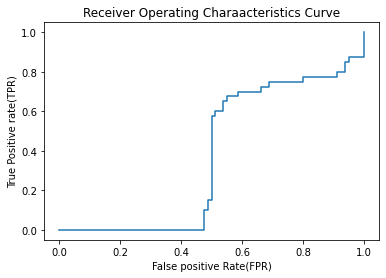

In [23]:
plt.plot(fpr,tpr)
plt.xlabel("False positive Rate(FPR)")
plt.ylabel("True Positive rate(TPR)")
plt.title("Receiver Operating Charaacteristics Curve")

In [24]:
columns = df.columns.to_list()
Project_data = {"Labeled_data" : {"Species" : {"Iris-setosa":0, 'Iris-versicolor':1, 'Iris-virginica':2}},
                "Columns":columns}

In [25]:
Project_data

{'Labeled_data': {'Species': {'Iris-setosa': 0,
   'Iris-versicolor': 1,
   'Iris-virginica': 2}},
 'Columns': ['SepalLengthCm',
  'SepalWidthCm',
  'PetalLengthCm',
  'PetalWidthCm',
  'Species']}

In [26]:
# Dump the model into pickle file:

with open ("model.pkl","wb") as f:
    pickle.dump(model,f)

In [27]:
with open ("Project_Data.json","w") as f:
    json.dump(Project_data,f)